# Budget Data Analysis
## Comprehensive analysis of personal expenses from July 2022 to November 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load and Explore Data

In [2]:
# Load data
df = pd.read_csv('../data/budget.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (6064, 3)

First few rows:


,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50
5,2022-07-06 05:59:15 +0000,Market,11.78
6,2022-07-06 05:59:41 +0000,Restuarant,10.00
7,2022-07-06 05:59:44 +0000,Market,1.38
8,2022-07-06 05:59:45 +0000,Restuarant,10.00
9,2022-07-06 05:59:56 +0000,Market,2.73


In [3]:
# Data info
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6064 non-null   object 
 1   category  6064 non-null   object 
 2   amount    6064 non-null   float64
dtypes: float64(1), object(2)
memory usage: 142.2+ KB


Basic Statistics:


,amount
count,6064.000000
mean,15.964716
std,74.599181
min,0.050000
25%,3.500000
50%,7.000000
75%,12.000000
max,2500.000000


In [4]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

print("Date range:", df['date'].min(), "to", df['date'].max())
print(f"Total duration: {(df['date'].max() - df['date'].min()).days} days")

Date range: 2022-07-06 05:57:10+00:00 to 2025-11-29 09:09:48+00:00
Total duration: 1242 days


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Missing values:
date           0
category       0
amount         0
year           0
month          0
year_month     0
day_of_week    0
hour           0
dtype: int64

Duplicate rows: 0


## 2. Overall Spending Statistics

In [6]:
# Overall statistics
total_spending = df['amount'].sum()
avg_transaction = df['amount'].mean()
median_transaction = df['amount'].median()
std_transaction = df['amount'].std()

print(f"Total Spending: ₼{total_spending:,.2f}")
print(f"Average Transaction: ₼{avg_transaction:.2f}")
print(f"Median Transaction: ₼{median_transaction:.2f}")
print(f"Std Deviation: ₼{std_transaction:.2f}")
print(f"\nMin Transaction: ₼{df['amount'].min():.2f}")
print(f"Max Transaction: ₼{df['amount'].max():.2f}")
print(f"\nTotal Transactions: {len(df):,}")

Total Spending: ₼96,810.04
Average Transaction: ₼15.96
Median Transaction: ₼7.00
Std Deviation: ₼74.60

Min Transaction: ₼0.05
Max Transaction: ₼2500.00

Total Transactions: 6,064


## 3. Category Analysis

In [7]:
# Category statistics
category_stats = df.groupby('category').agg({
    'amount': ['sum', 'mean', 'count', 'std']
}).round(2)
category_stats.columns = ['Total', 'Average', 'Count', 'Std Dev']
category_stats = category_stats.sort_values('Total', ascending=False)
category_stats['Percentage'] = (category_stats['Total'] / total_spending * 100).round(2)

print("\nTop 15 Categories by Total Spending:")
category_stats.head(15)


Top 15 Categories by Total Spending:


,Total,Average,Count,Std Dev,Percentage
category,,,,,
Restuarant,18848.36,23.39,806,26.52,19.47
Coffe,14381.67,9.09,1582,4.31,14.86
Market,10769.00,7.71,1396,8.24,11.12
Communal,10204.33,164.59,62,226.95,10.54
Health,6164.57,97.85,63,401.38,6.37
Clothing,5921.30,95.50,62,113.30,6.12
Tech,4730.73,278.28,17,643.30,4.89
Events,4392.30,67.57,65,88.41,4.54
Travel,3910.45,355.50,11,741.08,4.04


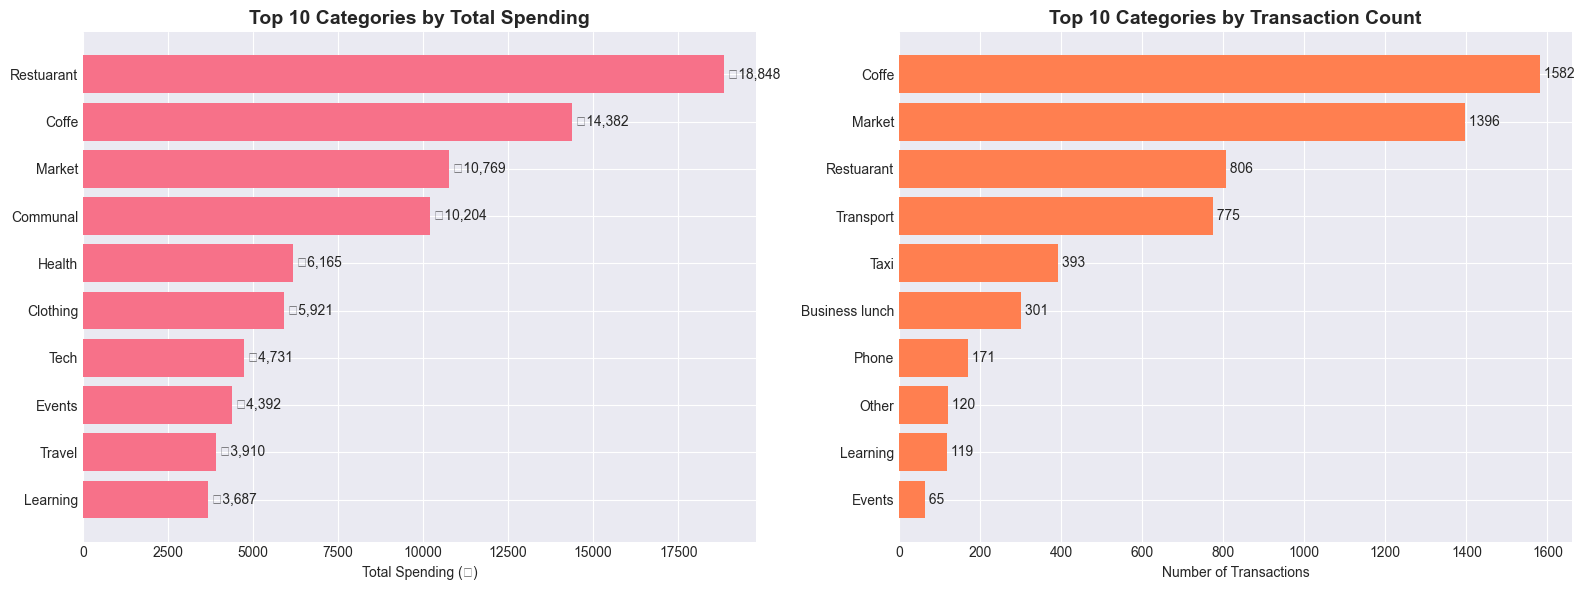

In [8]:
# Visualize top categories by total spending
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 by total amount
top_10_total = category_stats.head(10)
ax1.barh(range(len(top_10_total)), top_10_total['Total'])
ax1.set_yticks(range(len(top_10_total)))
ax1.set_yticklabels(top_10_total.index)
ax1.set_xlabel('Total Spending (₼)')
ax1.set_title('Top 10 Categories by Total Spending', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add values on bars
for i, v in enumerate(top_10_total['Total']):
    ax1.text(v, i, f' ₼{v:,.0f}', va='center')

# Top 10 by transaction count
top_10_count = category_stats.nlargest(10, 'Count')
ax2.barh(range(len(top_10_count)), top_10_count['Count'], color='coral')
ax2.set_yticks(range(len(top_10_count)))
ax2.set_yticklabels(top_10_count.index)
ax2.set_xlabel('Number of Transactions')
ax2.set_title('Top 10 Categories by Transaction Count', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

# Add values on bars
for i, v in enumerate(top_10_count['Count']):
    ax2.text(v, i, f' {int(v)}', va='center')

plt.tight_layout()
plt.show()

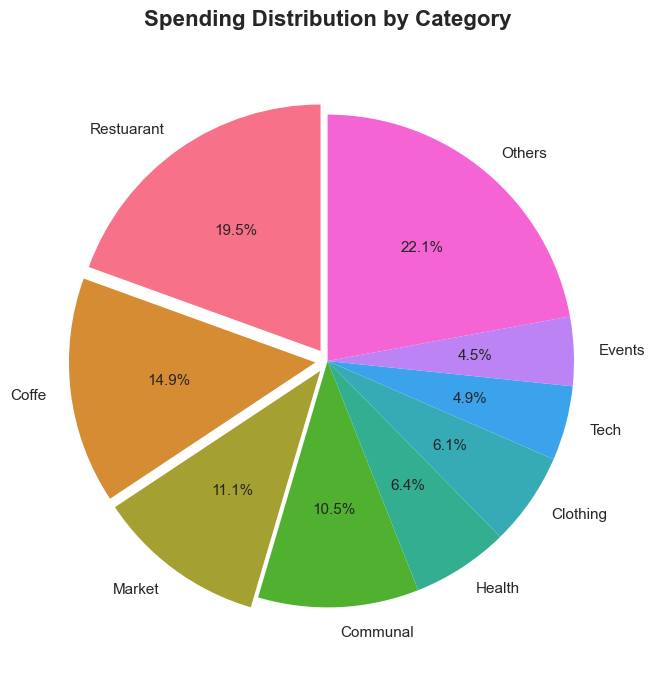

In [9]:
# Pie chart for top categories
fig, ax = plt.subplots(figsize=(12, 8))
top_8 = category_stats.head(8)
others = category_stats.iloc[8:]['Total'].sum()

values = list(top_8['Total']) + [others]
labels = list(top_8.index) + ['Others']

colors = sns.color_palette('husl', len(values))
explode = [0.05 if i < 3 else 0 for i in range(len(values))]

ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, 
       colors=colors, explode=explode, textprops={'fontsize': 11})
ax.set_title('Spending Distribution by Category', fontsize=16, fontweight='bold', pad=20)
plt.show()

## 4. Time Series Analysis

In [10]:
# Monthly spending
monthly_spending = df.groupby('year_month')['amount'].agg(['sum', 'count', 'mean']).reset_index()
monthly_spending.columns = ['Year_Month', 'Total', 'Count', 'Average']
monthly_spending['Year_Month_str'] = monthly_spending['Year_Month'].astype(str)

print("Monthly Spending Statistics:")
print(f"Average monthly spending: ₼{monthly_spending['Total'].mean():,.2f}")
print(f"Median monthly spending: ₼{monthly_spending['Total'].median():,.2f}")
print(f"Max monthly spending: ₼{monthly_spending['Total'].max():,.2f} ({monthly_spending.loc[monthly_spending['Total'].idxmax(), 'Year_Month']})")
print(f"Min monthly spending: ₼{monthly_spending['Total'].min():,.2f} ({monthly_spending.loc[monthly_spending['Total'].idxmin(), 'Year_Month']})")

Monthly Spending Statistics:
Average monthly spending: ₼2,361.22
Median monthly spending: ₼2,162.19
Max monthly spending: ₼5,509.49 (2024-07)
Min monthly spending: ₼1,017.81 (2022-11)


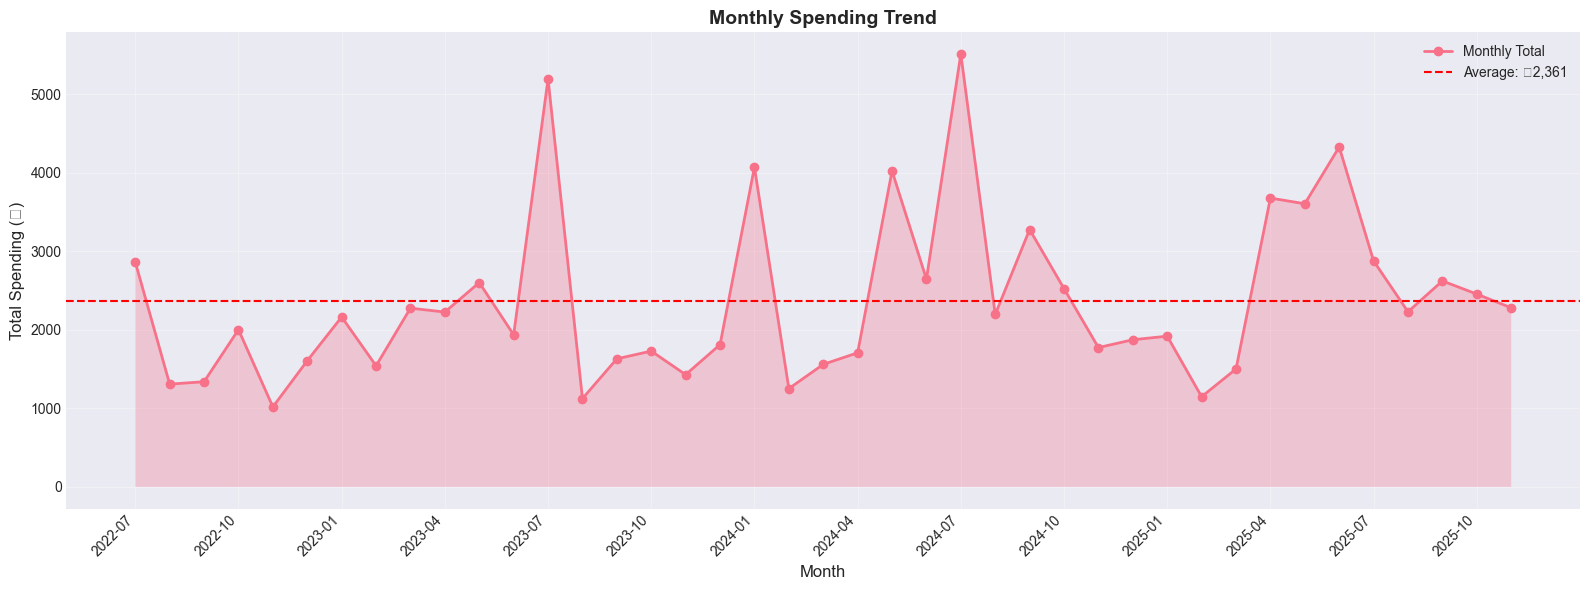

In [11]:
# Plot monthly spending trend
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(range(len(monthly_spending)), monthly_spending['Total'], 
        marker='o', linewidth=2, markersize=6, label='Monthly Total')
ax.axhline(y=monthly_spending['Total'].mean(), color='r', 
           linestyle='--', label=f'Average: ₼{monthly_spending["Total"].mean():,.0f}')
ax.fill_between(range(len(monthly_spending)), monthly_spending['Total'], 
                alpha=0.3)

# Set x-axis labels (show every 3rd month for readability)
tick_positions = range(0, len(monthly_spending), 3)
tick_labels = [monthly_spending['Year_Month_str'].iloc[i] for i in tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Spending (₼)', fontsize=12)
ax.set_title('Monthly Spending Trend', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Yearly comparison
yearly_spending = df.groupby('year').agg({
    'amount': ['sum', 'mean', 'count']
}).round(2)
yearly_spending.columns = ['Total', 'Average', 'Transactions']

print("\nYearly Spending Summary:")
yearly_spending


Yearly Spending Summary:


,Total,Average,Transactions
year,,,
2022,10131.84,12.73,796
2023,25651.22,16.22,1581
2024,32398.40,17.50,1851
2025,28628.58,15.59,1836


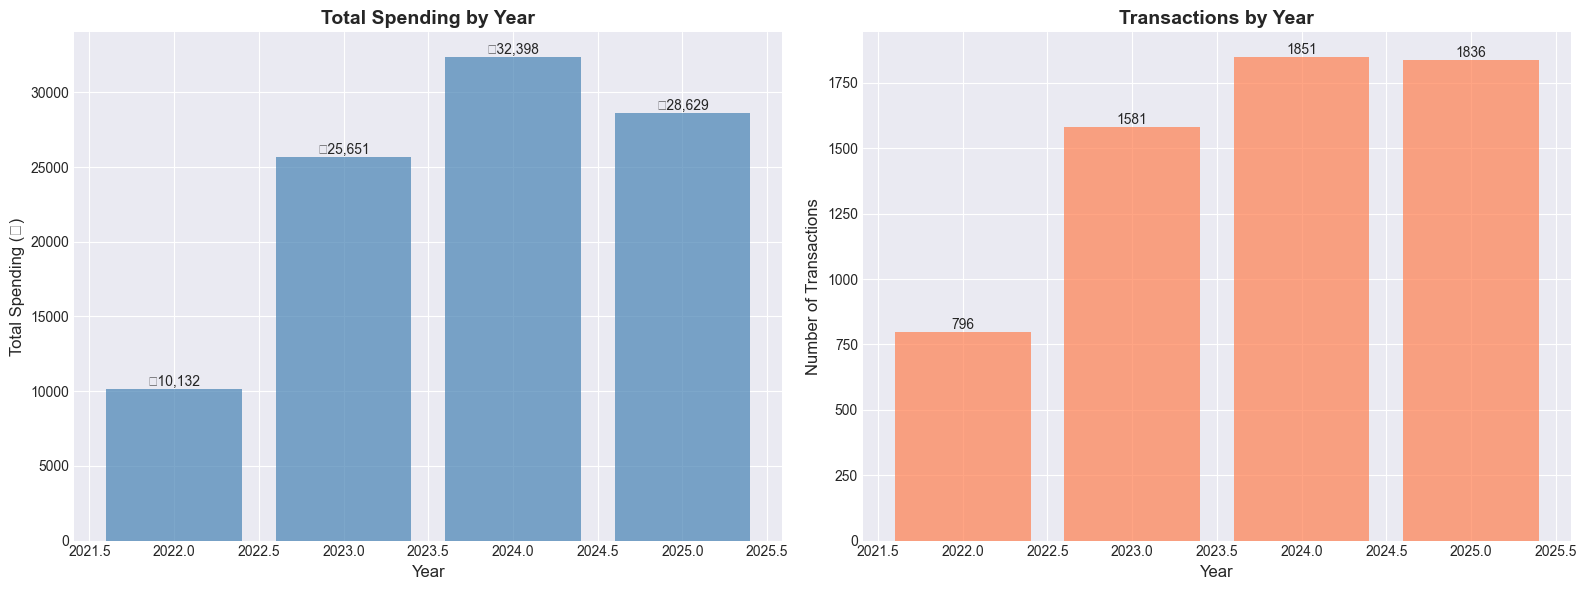

In [13]:
# Plot yearly comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total spending by year
ax1.bar(yearly_spending.index, yearly_spending['Total'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Spending (₼)', fontsize=12)
ax1.set_title('Total Spending by Year', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(yearly_spending.iterrows()):
    ax1.text(idx, row['Total'], f"₼{row['Total']:,.0f}", 
             ha='center', va='bottom', fontsize=10)

# Transaction count by year
ax2.bar(yearly_spending.index, yearly_spending['Transactions'], color='coral', alpha=0.7)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_title('Transactions by Year', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(yearly_spending.iterrows()):
    ax2.text(idx, row['Transactions'], f"{int(row['Transactions'])}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Spending Patterns by Time

In [14]:
# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_spending = df.groupby('day_of_week')['amount'].agg(['sum', 'mean', 'count']).reindex(day_order)
dow_spending.columns = ['Total', 'Average', 'Count']

print("\nSpending by Day of Week:")
dow_spending


Spending by Day of Week:


,Total,Average,Count
day_of_week,,,
Monday,11712.100,13.698363,855
Tuesday,14215.160,17.106089,831
Wednesday,17168.610,19.355817,887
Thursday,11901.160,14.692790,810
Friday,16045.200,18.008081,891
Saturday,12125.445,14.017855,865
Sunday,13642.360,14.748497,925


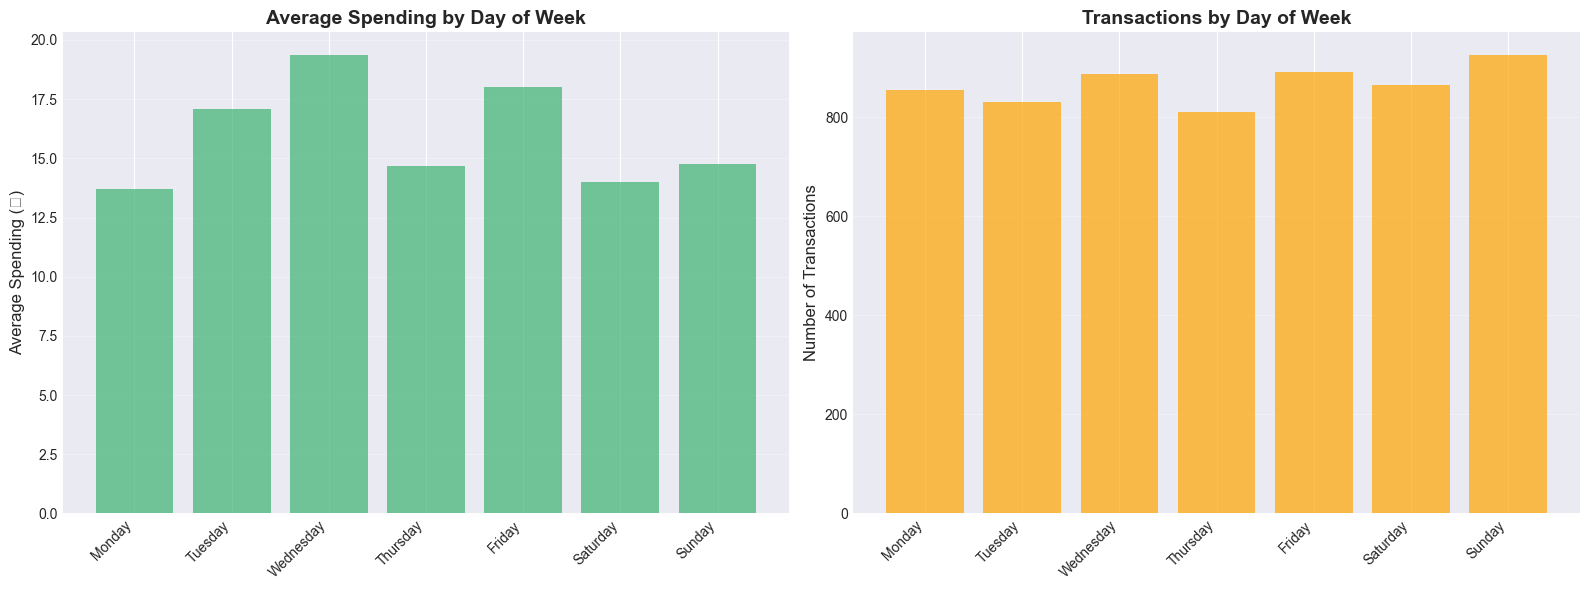

In [15]:
# Plot day of week patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Average spending by day
ax1.bar(range(7), dow_spending['Average'], color='mediumseagreen', alpha=0.7)
ax1.set_xticks(range(7))
ax1.set_xticklabels(day_order, rotation=45, ha='right')
ax1.set_ylabel('Average Spending (₼)', fontsize=12)
ax1.set_title('Average Spending by Day of Week', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Transaction count by day
ax2.bar(range(7), dow_spending['Count'], color='orange', alpha=0.7)
ax2.set_xticks(range(7))
ax2.set_xticklabels(day_order, rotation=45, ha='right')
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_title('Transactions by Day of Week', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

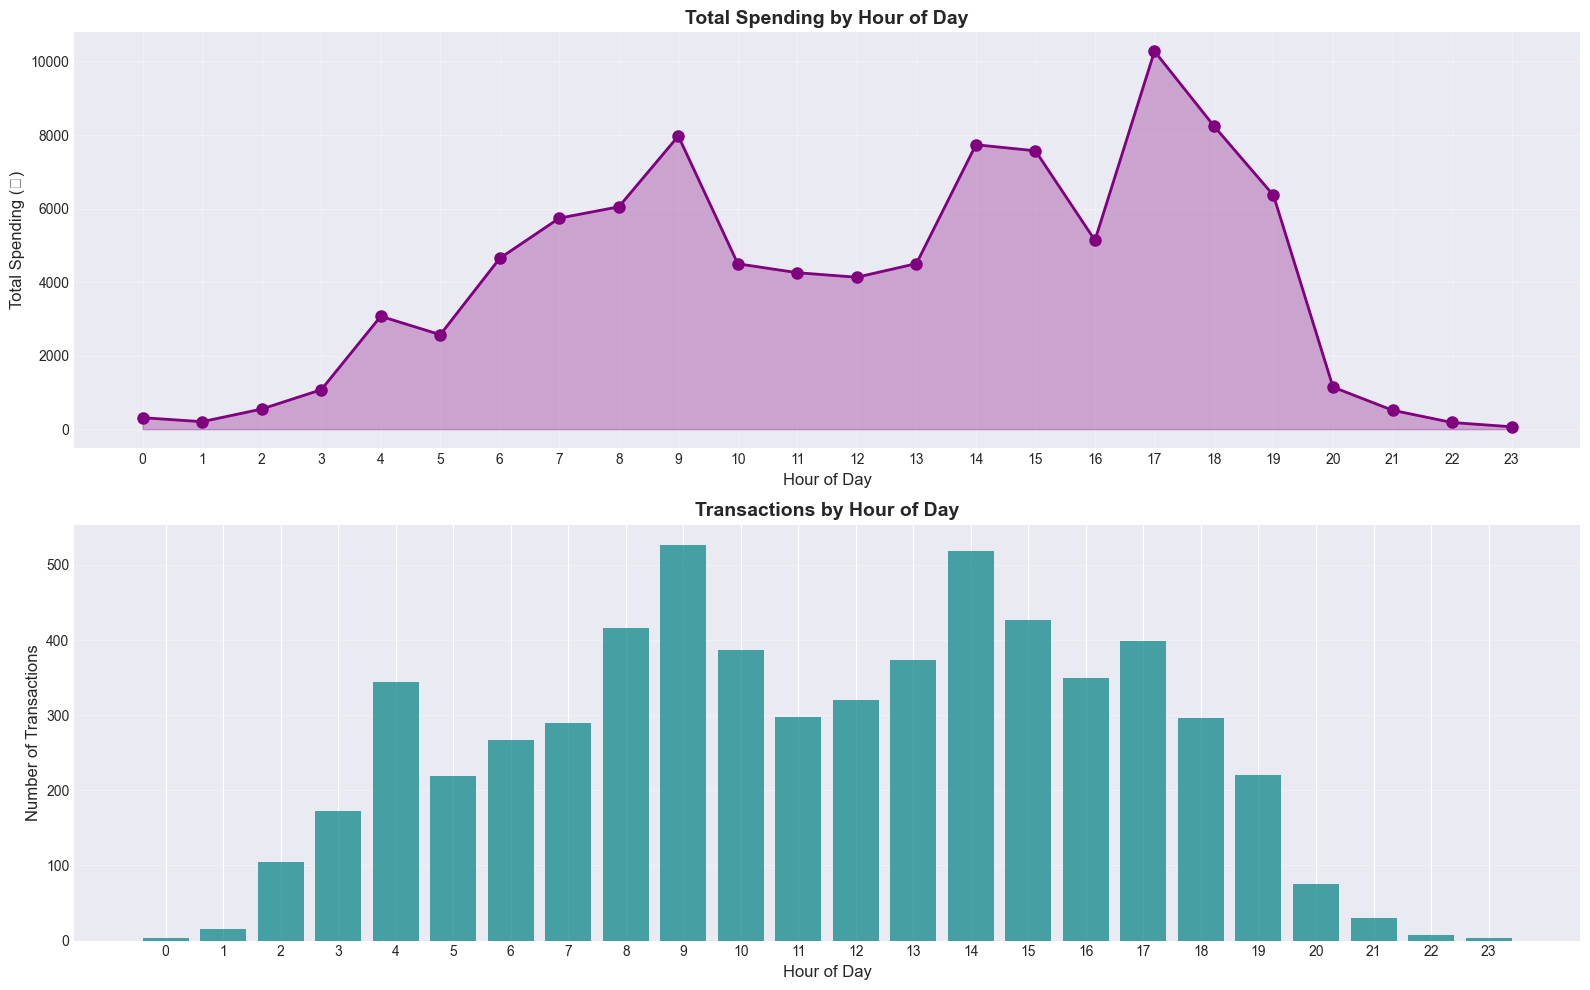

In [16]:
# Hour of day analysis
hour_spending = df.groupby('hour')['amount'].agg(['sum', 'mean', 'count'])
hour_spending.columns = ['Total', 'Average', 'Count']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Spending by hour
ax1.plot(hour_spending.index, hour_spending['Total'], 
         marker='o', linewidth=2, markersize=8, color='purple')
ax1.fill_between(hour_spending.index, hour_spending['Total'], alpha=0.3, color='purple')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Total Spending (₼)', fontsize=12)
ax1.set_title('Total Spending by Hour of Day', fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Transaction count by hour
ax2.bar(hour_spending.index, hour_spending['Count'], color='teal', alpha=0.7)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_title('Transactions by Hour of Day', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Category Trends Over Time

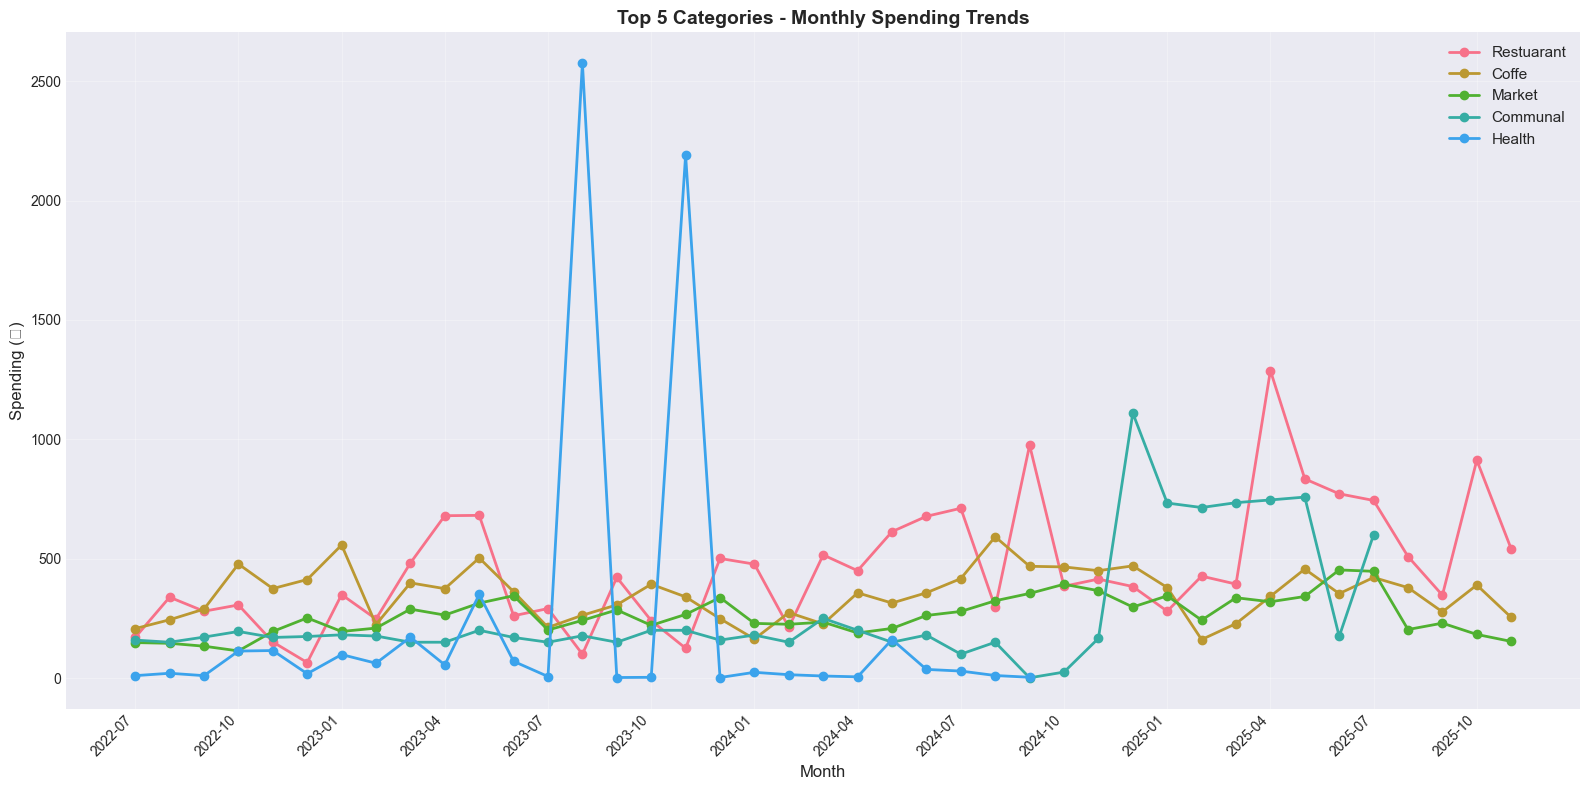

In [17]:
# Top 5 categories spending over time
top_5_categories = category_stats.head(5).index.tolist()

fig, ax = plt.subplots(figsize=(16, 8))

for category in top_5_categories:
    cat_monthly = df[df['category'] == category].groupby('year_month')['amount'].sum()
    ax.plot(range(len(cat_monthly)), cat_monthly.values, 
            marker='o', linewidth=2, label=category)

# Set x-axis labels
all_months = df.groupby('year_month').size().index.astype(str)
tick_positions = range(0, len(all_months), 3)
tick_labels = [all_months[i] for i in tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Spending (₼)', fontsize=12)
ax.set_title('Top 5 Categories - Monthly Spending Trends', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Distribution Analysis

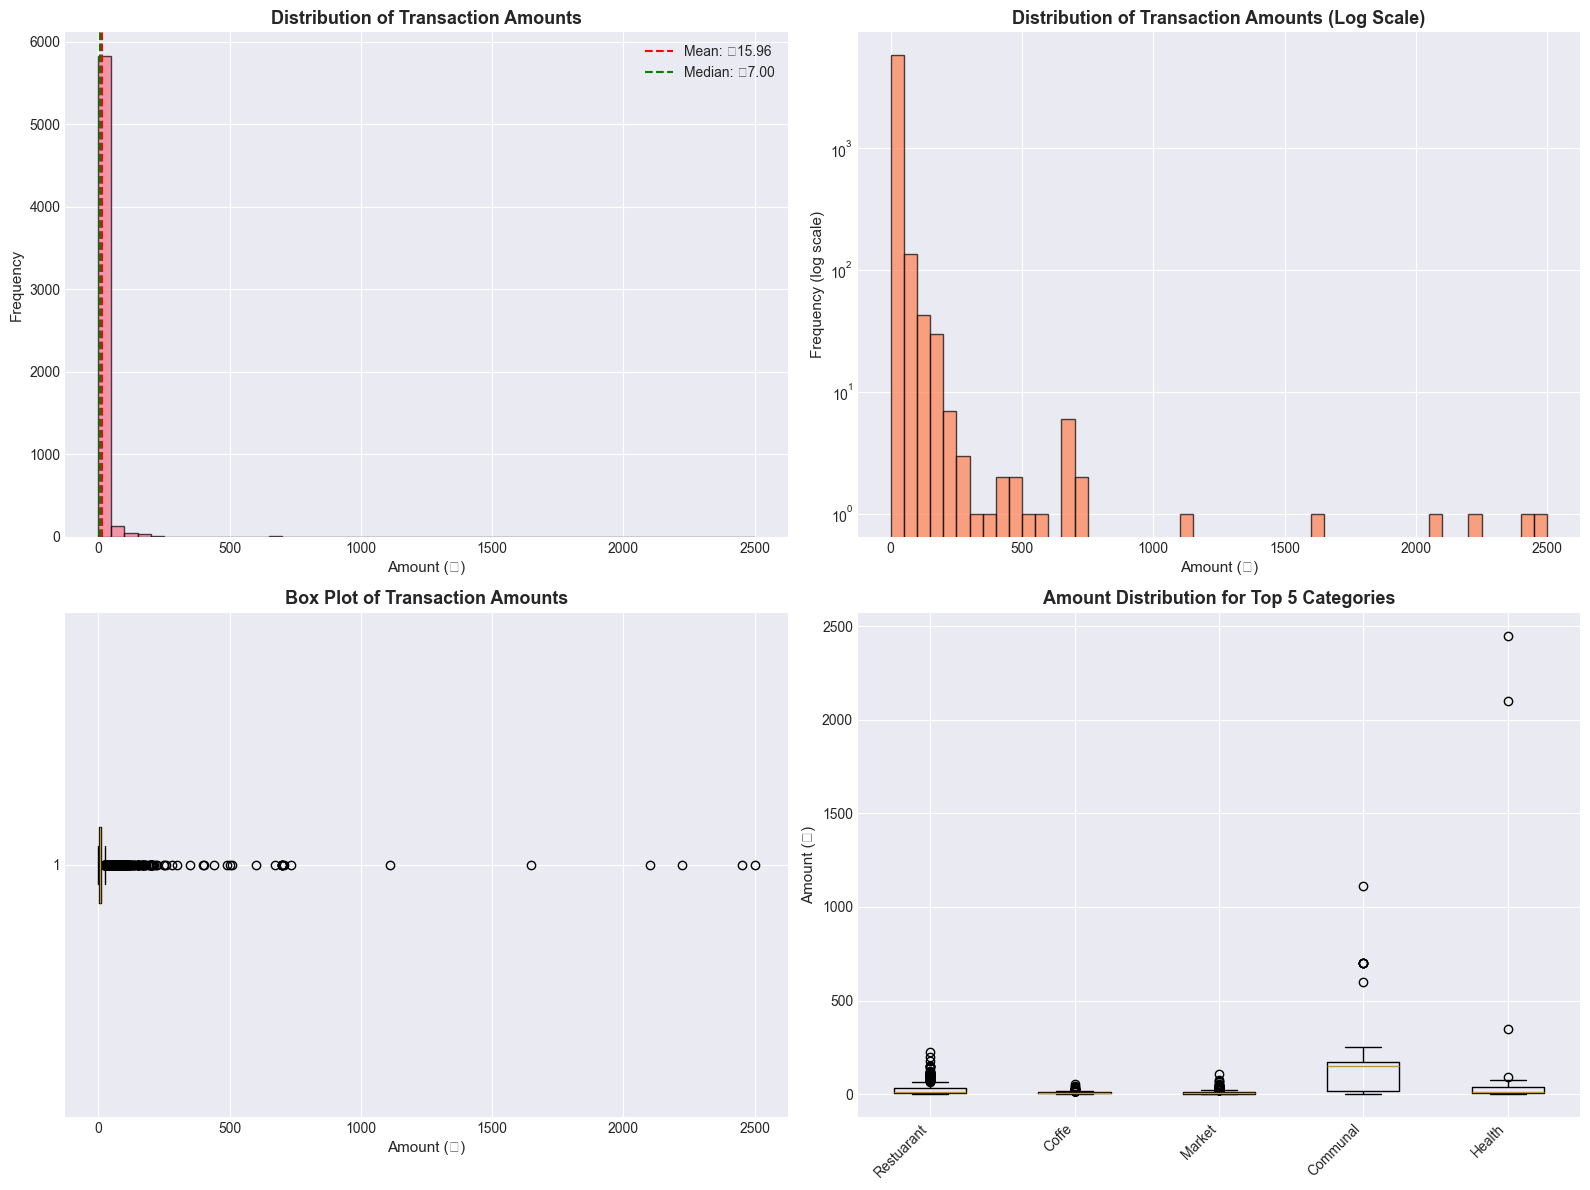

In [18]:
# Amount distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df['amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Amount (₼)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Transaction Amounts', fontsize=13, fontweight='bold')
axes[0, 0].axvline(df['amount'].mean(), color='r', linestyle='--', 
                   label=f'Mean: ₼{df["amount"].mean():.2f}')
axes[0, 0].axvline(df['amount'].median(), color='g', linestyle='--', 
                   label=f'Median: ₼{df["amount"].median():.2f}')
axes[0, 0].legend()

# Log scale histogram
axes[0, 1].hist(df['amount'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Amount (₼)', fontsize=11)
axes[0, 1].set_ylabel('Frequency (log scale)', fontsize=11)
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Distribution of Transaction Amounts (Log Scale)', fontsize=13, fontweight='bold')

# Box plot
axes[1, 0].boxplot(df['amount'], vert=False)
axes[1, 0].set_xlabel('Amount (₼)', fontsize=11)
axes[1, 0].set_title('Box Plot of Transaction Amounts', fontsize=13, fontweight='bold')

# Box plot for top categories
top_cats_data = [df[df['category'] == cat]['amount'].values for cat in top_5_categories]
axes[1, 1].boxplot(top_cats_data, labels=top_5_categories)
axes[1, 1].set_xticklabels(top_5_categories, rotation=45, ha='right')
axes[1, 1].set_ylabel('Amount (₼)', fontsize=11)
axes[1, 1].set_title('Amount Distribution for Top 5 Categories', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
# Percentile analysis
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("Transaction Amount Percentiles:")
for p in percentiles:
    value = np.percentile(df['amount'], p)
    print(f"{p}th percentile: ₼{value:.2f}")

Transaction Amount Percentiles:
10th percentile: ₼1.00
25th percentile: ₼3.50
50th percentile: ₼7.00
75th percentile: ₼12.00
90th percentile: ₼23.00
95th percentile: ₼45.00
99th percentile: ₼152.37


## 8. Correlation and Heatmap Analysis

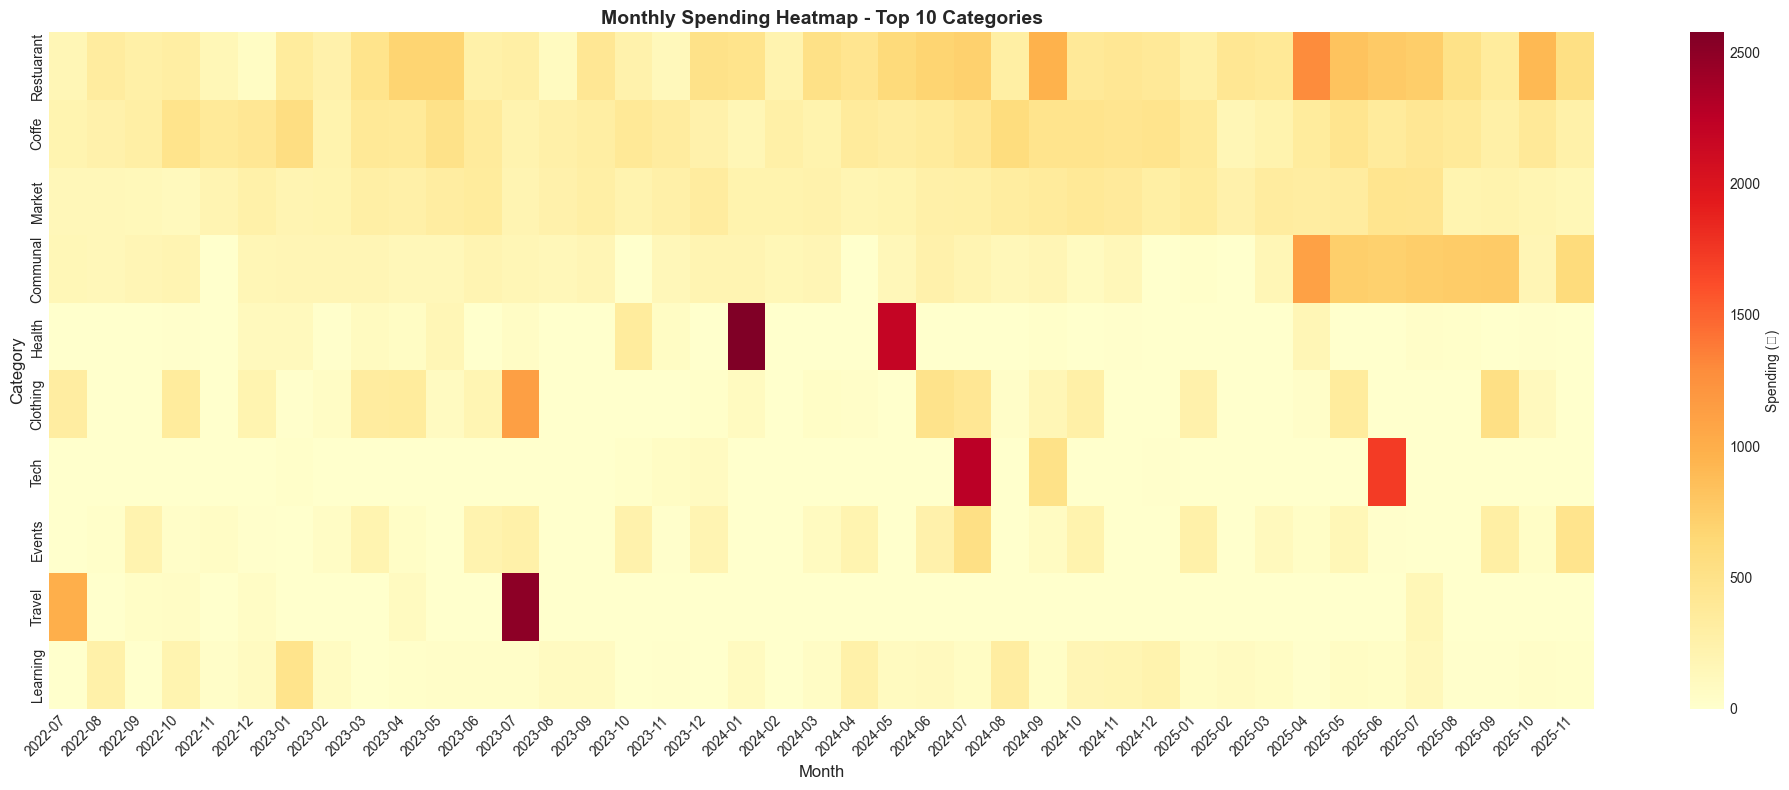

In [20]:
# Create pivot table for category-month heatmap
pivot_data = df.pivot_table(
    values='amount', 
    index='category', 
    columns='year_month', 
    aggfunc='sum', 
    fill_value=0
)

# Filter to top 10 categories for visibility
top_10_cats = category_stats.head(10).index
pivot_top = pivot_data.loc[top_10_cats]

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(pivot_top, cmap='YlOrRd', annot=False, fmt='.0f', 
            cbar_kws={'label': 'Spending (₼)'}, ax=ax)
ax.set_title('Monthly Spending Heatmap - Top 10 Categories', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Category', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Summary Statistics and Key Insights

In [21]:
print("="*70)
print("KEY INSIGHTS FROM BUDGET DATA ANALYSIS")
print("="*70)

print("\n1. OVERALL STATISTICS:")
print(f"   - Total Spending: ₼{total_spending:,.2f}")
print(f"   - Time Period: {(df['date'].max() - df['date'].min()).days} days")
print(f"   - Total Transactions: {len(df):,}")
print(f"   - Average Daily Spending: ₼{total_spending / (df['date'].max() - df['date'].min()).days:.2f}")

print("\n2. TOP 5 SPENDING CATEGORIES:")
for i, (cat, row) in enumerate(category_stats.head(5).iterrows(), 1):
    print(f"   {i}. {cat}: ₼{row['Total']:,.2f} ({row['Percentage']:.1f}% of total)")

print("\n3. MONTHLY PATTERNS:")
print(f"   - Average Monthly Spending: ₼{monthly_spending['Total'].mean():,.2f}")
print(f"   - Highest Month: {monthly_spending.loc[monthly_spending['Total'].idxmax(), 'Year_Month']} - ₼{monthly_spending['Total'].max():,.2f}")
print(f"   - Lowest Month: {monthly_spending.loc[monthly_spending['Total'].idxmin(), 'Year_Month']} - ₼{monthly_spending['Total'].min():,.2f}")

print("\n4. TRANSACTION PATTERNS:")
print(f"   - Most Frequent Category: {category_stats.nlargest(1, 'Count').index[0]} ({int(category_stats.nlargest(1, 'Count')['Count'].values[0])} transactions)")
print(f"   - Highest Average Transaction: {category_stats.nlargest(1, 'Average').index[0]} (₼{category_stats.nlargest(1, 'Average')['Average'].values[0]:.2f})")
print(f"   - Most Active Day: {dow_spending.nlargest(1, 'Count').index[0]} ({int(dow_spending.nlargest(1, 'Count')['Count'].values[0])} transactions)")

print("\n5. YEARLY TRENDS:")
for year in sorted(yearly_spending.index):
    print(f"   - {year}: ₼{yearly_spending.loc[year, 'Total']:,.2f} ({int(yearly_spending.loc[year, 'Transactions'])} transactions)")

print("\n" + "="*70)

KEY INSIGHTS FROM BUDGET DATA ANALYSIS

1. OVERALL STATISTICS:
   - Total Spending: ₼96,810.04
   - Time Period: 1242 days
   - Total Transactions: 6,064
   - Average Daily Spending: ₼77.95

2. TOP 5 SPENDING CATEGORIES:
   1. Restuarant: ₼18,848.36 (19.5% of total)
   2. Coffe: ₼14,381.67 (14.9% of total)
   3. Market: ₼10,769.00 (11.1% of total)
   4. Communal: ₼10,204.33 (10.5% of total)
   5. Health: ₼6,164.57 (6.4% of total)

3. MONTHLY PATTERNS:
   - Average Monthly Spending: ₼2,361.22
   - Highest Month: 2024-07 - ₼5,509.49
   - Lowest Month: 2022-11 - ₼1,017.81

4. TRANSACTION PATTERNS:
   - Most Frequent Category: Coffe (1582 transactions)
   - Highest Average Transaction: Motel (₼675.00)
   - Most Active Day: Sunday (925 transactions)

5. YEARLY TRENDS:
   - 2022: ₼10,131.84 (796 transactions)
   - 2023: ₼25,651.22 (1581 transactions)
   - 2024: ₼32,398.40 (1851 transactions)
   - 2025: ₼28,628.58 (1836 transactions)



## 10. Data Quality Notes

In [22]:
# Check for potential data quality issues
print("DATA QUALITY CHECKS:")
print("\n1. Category Name Variations:")
print("   Unique categories:", df['category'].nunique())
print("   All categories:", sorted(df['category'].unique()))

print("\n2. Outlier Transactions (> ₼500):")
large_transactions = df[df['amount'] > 500].sort_values('amount', ascending=False)
print(f"   Found {len(large_transactions)} large transactions")
if len(large_transactions) > 0:
    print("\n   Top 10 largest:")
    print(large_transactions[['date', 'category', 'amount']].head(10).to_string())

print("\n3. Very Small Transactions (< ₼1):")
small_transactions = df[df['amount'] < 1]
print(f"   Found {len(small_transactions)} transactions under ₼1")
if len(small_transactions) > 0:
    print(f"   Smallest: ₼{small_transactions['amount'].min():.2f}")

DATA QUALITY CHECKS:

1. Category Name Variations:
   Unique categories: 23
   All categories: ['Barber', 'Business lunch', 'Clothing', 'Coffe', 'Communal', 'Events', 'Film/enjoyment', 'Fuel', 'Health', 'Learning', 'Market', 'Motel', 'Other', 'Phone', 'Rent Car', 'Restuarant', 'Sport', 'Taxi', 'Tech', 'Transport', 'Travel', 'business_expenses', 'joy']

2. Outlier Transactions (> ₼500):
   Found 16 large transactions

   Top 10 largest:
                          date  category   amount
1789 2023-07-26 18:16:43+00:00    Travel  2500.00
2466 2024-01-30 17:17:33+00:00    Health  2450.00
3164 2024-07-17 07:45:50+00:00      Tech  2222.00
2793 2024-05-03 17:12:52+00:00    Health  2100.00
5078 2025-06-06 09:00:22+00:00      Tech  1650.00
4708 2025-04-04 06:37:05+00:00  Communal  1110.00
69   2022-07-28 19:19:02+00:00    Travel   733.25
1787 2023-07-26 18:15:44+00:00  Clothing   708.00
4871 2025-05-04 08:18:16+00:00  Communal   700.00
5071 2025-06-04 15:21:18+00:00  Communal   700.00

3. Very S